# **Technical Document II**

# Initial setup

In [ ]:
# Importamos las paqueterías que utilizaremos
import pandas as pd
import numpy as np
import seaborn as sns
import random
import matplotlib.pyplot as plt

# Importing the dataset

In [ ]:
# Nos conectamos a google drive para importar la base de datos
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Leemos la base y la guardamos en un dataframe "df"
df = pd.read_csv('drive/My Drive/Colab Notebooks/clase/Video_Games.csv')

In [ ]:
#Imprimimos el número de renglones y columnas que tiene el dataframe y observamos los primeros tres renglones
print(df.shape)
df.head(3)

(16928, 17)


,index,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E


## Possible limitations

In [ ]:
#Vamos a conocer la cantidad de valores no nulos del dataframe y el tipo de variables que contiene cada columna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16928 entries, 0 to 16927
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            16928 non-null  int64  
 1   Name             16926 non-null  object 
 2   Platform         16928 non-null  object 
 3   Year_of_Release  16655 non-null  float64
 4   Genre            16926 non-null  object 
 5   Publisher        16873 non-null  object 
 6   NA_Sales         16928 non-null  float64
 7   EU_Sales         16928 non-null  float64
 8   JP_Sales         16928 non-null  float64
 9   Other_Sales      16928 non-null  float64
 10  Global_Sales     16928 non-null  float64
 11  Critic_Score     8260 non-null   float64
 12  Critic_Count     8260 non-null   float64
 13  User_Score       10159 non-null  object 
 14  User_Count       7718 non-null   float64
 15  Developer        10240 non-null  object 
 16  Rating           10092 non-null  object 
dtypes: float64(9

In [ ]:
#Calculamos el porcentaje de los valores nulos de todas las columnas para saber si borramos una columna o no
#Nuestro criterio será que, en caso de tener más del 20% de valores nulos, eliminaremos la columna, en otro caso agregaremos el valor medio
na_per = df.isnull().sum().sort_values(ascending=False) / len(df) * 100

In [ ]:
#Buscaremos posibles outliers y errores en los datos
df.describe()

,index,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16928.000000,16655.00000,16928.000000,16928.000000,16928.000000,16928.000000,16928.000000,8260.000000,8260.000000,7718.000000
mean,8463.500000,2006.48532,0.266390,0.146850,0.078170,0.047861,0.539520,69.037893,26.428692,163.269629
std,4886.837014,5.88289,0.814326,0.504585,0.308756,0.186675,1.550545,13.943198,18.989929,562.786746
min,0.000000,1980.00000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,4231.750000,2003.00000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,8463.500000,2007.00000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,22.000000,25.000000
75%,12695.250000,2010.00000,0.240000,0.110000,0.040000,0.040000,0.490000,79.000000,36.000000,82.000000
max,16927.000000,2020.00000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


# Feature engineering

## Cleaning data

In [ ]:
#A diferencia del otro código, no nos basamos en eliminar
df2 = df.copy()
df2 = df2.drop(columns= ['Critic_Count','User_Count'])
df2 = df2.drop(columns = 'Name')
df2 = df2.drop(columns = 'index')
df2 = df2.dropna()

In [ ]:
#Creo columnas que tengan los porcentajes de las ventas con respecto a las ventas globales
df2.insert(loc = 9, column ='Per_Other_Sales', value = round((df2['Other_Sales'] / df2['Global_Sales']) * 100, ndigits = 2))
df2.insert(loc = 9, column ='Per_JP_Sales', value = round((df2['JP_Sales'] / df2['Global_Sales']) * 100, ndigits = 2))
df2.insert(loc = 9, column ='Per_EU_Sales', value = round((df2['EU_Sales'] / df2['Global_Sales']) * 100, ndigits = 2))
df2.insert(loc = 9, column ='Per_NA_Sales', value = round((df2['NA_Sales'] / df2['Global_Sales']) * 100, ndigits = 2))

#Creo una columna llamada 'Per_Global_Sales' que me ayude a visualizar outliers en el número de ventas
df2['Per_Global_Sales'] = round(df2['Per_EU_Sales'] + df2['Per_NA_Sales'] + df2['Per_JP_Sales'] + df2['Per_Other_Sales'], ndigits = 0)

In [ ]:
#Histograma para saber si hay ventas que no sumen el 100% de las mismas
#plt.hist(df2['Per_Global_Sales'], bins=20, color='skyblue', edgecolor='black')

In [ ]:
# Convierto la columna 'Year_of_Release' a enteros para guardar memoria
df2['Year_of_Release'] = df2['Year_of_Release'].astype(int)

#Borro los renglones que no sumen 100% de las ventas
df2 = df2.drop(df2[df2['Per_Global_Sales'] != 100].index)

#Borro la columna de porcentaje total porque sólo es auxiliar
df2 = df2.drop(columns = 'Per_Global_Sales')

In [ ]:
#Buscamos la región que en promedio tenga la mayor participación en el mercado
promedio1=df2['Per_EU_Sales'].mean()
promedio2=df2['Per_JP_Sales'].mean()
promedio3=df2['Per_NA_Sales'].mean()
promedio4=df2['Per_Other_Sales'].mean()
mx= promedio3
print('El que en general tiene mayor participación en el mercado es ', mx)

El que en general tiene mayor participación en el mercado es  56.66843784581336


In [ ]:
# Guardando copia
df3 = df2.copy()


Dado que NA tiene el mayor porcentaje de ventas, vamos a predecir eso

## Add Rating

In [ ]:
df3['Rating'].unique()

array(['E', 'M', 'T', 'E10+'], dtype=object)

In [ ]:
#Agrupar todas las categorías de 'Platform' que representen menos del 5% de los datos
df3['Platform'] = df3['Platform'].apply(lambda x: x if df3['Platform'].value_counts()[x] / len(df3) > 0.05 else 'Other')
#Agrupar todas las categorías de 'Publisher' que representen menos del 4% de los datos (Porcentaje elegido porque caso contrario se eliminaban muchas categorías)
df3['Publisher'] = df3['Publisher'].apply(lambda x: x if df3['Publisher'].value_counts()[x] / len(df3) > 0.04 else 'Other')
#Agrupar todas las categorías de 'Platform' que representen menos del 10% de los datos (Lo cual no pasó pero nos sirve para escalabilidad)
df3['Rating'] = df3['Rating'].apply(lambda x: x if df3['Rating'].value_counts()[x] / len(df3) > 0.10 else 'Other')


In [ ]:
df3['Platform'] = df3['Platform'].apply(lambda x: x if df3['Platform'].value_counts()[x] / len(df3) > 0.05 else 'Other')
df3['Publisher'] = df3['Publisher'].apply(lambda x: x if df3['Publisher'].value_counts()[x] / len(df3) > 0.04 else 'Other')

In [ ]:
#Guardamos otra copia por si acaso
df5 = df3.copy()

## Categorical encoding

In [ ]:
# Guardando copia
df4 = df3.copy()

#Obtenemos vectores con todas las categorías de las variables categóricas para registrar qué categorías existen antes de transformarlas a dummies
print(df4['Platform'].unique())
print(df4['Genre'].unique())
print(df4['Publisher'].unique())

['Wii' 'DS' 'X360' 'PS3' 'PS2' 'Other' 'XB' 'PC' 'PSP' 'GC' 'GBA']
['Sports' 'Racing' 'Platform' 'Misc' 'Action' 'Puzzle' 'Shooter'
 'Fighting' 'Simulation' 'Role-Playing' 'Adventure' 'Strategy']
['Other' 'Sony Computer Entertainment' 'Activision' 'Ubisoft'
 'Electronic Arts' 'THQ']


In [ ]:
#Creamos columnas con dummies para las variables categóricas
df4 = pd.concat([df4, pd.get_dummies(df4['Platform'], prefix = 'Platform', dtype = int)], axis=1).drop(columns = ['Platform'])
df4 = pd.concat([df4, pd.get_dummies(df4['Genre'], prefix = 'Genre', dtype = int)], axis=1).drop(columns = ['Genre'])
df4 = pd.concat([df4, pd.get_dummies(df4['Publisher'], prefix = 'Publisher', dtype = int)], axis=1).drop(columns = ['Publisher'])

#Vuelo indexar los renglones
df4.reset_index(drop=True, inplace=True)

## Clean data

In [ ]:
df3.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Per_NA_Sales,Per_EU_Sales,Per_JP_Sales,Per_Other_Sales,Critic_Score
count,5422.000000,5422.000000,5422.000000,5422.000000,5422.000000,5422.000000,5422.000000,5422.000000,5422.000000,5422.000000,5422.000000
mean,2007.190705,0.433940,0.260900,0.067778,0.090754,0.853303,56.668438,28.418071,6.575452,8.340059,69.669310
std,4.185577,1.083842,0.771103,0.317018,0.302330,2.205534,26.986096,23.334875,18.151831,7.485432,14.150547
min,1988.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2004.000000,0.060000,0.010000,0.000000,0.010000,0.100000,41.540000,10.260000,0.000000,2.830000,61.000000
50%,2007.000000,0.140000,0.050000,0.000000,0.020000,0.260000,57.350000,26.230000,0.000000,8.260000,71.000000
75%,2010.000000,0.400000,0.210000,0.010000,0.070000,0.750000,77.140000,38.460000,0.850000,12.500000,80.000000
max,2016.000000,41.360000,28.960000,6.500000,10.570000,82.530000,100.000000,100.000000,100.000000,90.000000,98.000000


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5422 entries, 0 to 16926
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Platform         5422 non-null   object 
 1   Year_of_Release  5422 non-null   int64  
 2   Genre            5422 non-null   object 
 3   Publisher        5422 non-null   object 
 4   NA_Sales         5422 non-null   float64
 5   EU_Sales         5422 non-null   float64
 6   JP_Sales         5422 non-null   float64
 7   Other_Sales      5422 non-null   float64
 8   Global_Sales     5422 non-null   float64
 9   Per_NA_Sales     5422 non-null   float64
 10  Per_EU_Sales     5422 non-null   float64
 11  Per_JP_Sales     5422 non-null   float64
 12  Per_Other_Sales  5422 non-null   float64
 13  Critic_Score     5422 non-null   float64
 14  User_Score       5422 non-null   object 
 15  Developer        5422 non-null   object 
 16  Rating           5422 non-null   object 
dtypes: float64(10), in

In [ ]:
df5

,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Per_NA_Sales,Per_EU_Sales,Per_JP_Sales,Per_Other_Sales,Critic_Score,User_Score,Developer,Rating
0,Wii,2006,Sports,Other,41.36,28.96,3.77,8.45,82.53,50.12,35.09,4.57,10.24,76.0,8,Nintendo,E
2,Wii,2008,Racing,Other,15.68,12.76,3.79,3.29,35.52,44.14,35.92,10.67,9.26,82.0,8.3,Nintendo,E
3,Wii,2009,Sports,Other,15.61,10.93,3.28,2.95,32.77,47.64,33.35,10.01,9.00,80.0,8,Nintendo,E
6,DS,2006,Platform,Other,11.28,9.14,6.50,2.88,29.80,37.85,30.67,21.81,9.66,89.0,8.5,Nintendo,E
7,Wii,2006,Misc,Other,13.96,9.18,2.93,2.84,28.92,48.27,31.74,10.13,9.82,58.0,6.6,Nintendo,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16917,GBA,2003,Sports,Activision,0.43,0.16,0.00,0.01,0.60,71.67,26.67,0.00,1.67,86.0,7.7,Vicarious Visions,E
16921,PS2,2005,Platform,Other,0.50,0.02,0.00,0.08,0.60,83.33,3.33,0.00,13.33,45.0,6,Sonic Team,E10+
16923,PS3,2013,Shooter,Other,0.20,0.29,0.00,0.11,0.60,33.33,48.33,0.00,18.33,43.0,3.6,Gearbox Software,M
16925,PS3,2011,Shooter,Other,0.09,0.06,0.42,0.03,0.60,15.00,10.00,70.00,5.00,64.0,7.4,Ryu ga Gotoku Studios,M


# Supervised ML

In [ ]:
df5.info()
#User Score lo tenemos que convertir a float
#Rating lo usaremos como Mean Encoding más adelante

<class 'pandas.core.frame.DataFrame'>
Index: 5422 entries, 0 to 16926
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Platform         5422 non-null   object 
 1   Year_of_Release  5422 non-null   int64  
 2   Genre            5422 non-null   object 
 3   Publisher        5422 non-null   object 
 4   NA_Sales         5422 non-null   float64
 5   EU_Sales         5422 non-null   float64
 6   JP_Sales         5422 non-null   float64
 7   Other_Sales      5422 non-null   float64
 8   Global_Sales     5422 non-null   float64
 9   Per_NA_Sales     5422 non-null   float64
 10  Per_EU_Sales     5422 non-null   float64
 11  Per_JP_Sales     5422 non-null   float64
 12  Per_Other_Sales  5422 non-null   float64
 13  Critic_Score     5422 non-null   float64
 14  User_Score       5422 non-null   object 
 15  Developer        5422 non-null   object 
 16  Rating           5422 non-null   object 
dtypes: float64(10), in

In [ ]:
#Convertimos el score a float
df5['User_Score'] = pd.to_numeric(df5['User_Score'], errors='coerce')
df5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5422 entries, 0 to 16926
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Platform         5422 non-null   object 
 1   Year_of_Release  5422 non-null   int64  
 2   Genre            5422 non-null   object 
 3   Publisher        5422 non-null   object 
 4   NA_Sales         5422 non-null   float64
 5   EU_Sales         5422 non-null   float64
 6   JP_Sales         5422 non-null   float64
 7   Other_Sales      5422 non-null   float64
 8   Global_Sales     5422 non-null   float64
 9   Per_NA_Sales     5422 non-null   float64
 10  Per_EU_Sales     5422 non-null   float64
 11  Per_JP_Sales     5422 non-null   float64
 12  Per_Other_Sales  5422 non-null   float64
 13  Critic_Score     5422 non-null   float64
 14  User_Score       4728 non-null   float64
 15  Developer        5422 non-null   object 
 16  Rating           5422 non-null   object 
dtypes: float64(11), in

In [ ]:
#Un videojuego que no está calificado no nos funciona
df5.dropna(axis=0,inplace=True)
df5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4728 entries, 0 to 16926
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Platform         4728 non-null   object 
 1   Year_of_Release  4728 non-null   int64  
 2   Genre            4728 non-null   object 
 3   Publisher        4728 non-null   object 
 4   NA_Sales         4728 non-null   float64
 5   EU_Sales         4728 non-null   float64
 6   JP_Sales         4728 non-null   float64
 7   Other_Sales      4728 non-null   float64
 8   Global_Sales     4728 non-null   float64
 9   Per_NA_Sales     4728 non-null   float64
 10  Per_EU_Sales     4728 non-null   float64
 11  Per_JP_Sales     4728 non-null   float64
 12  Per_Other_Sales  4728 non-null   float64
 13  Critic_Score     4728 non-null   float64
 14  User_Score       4728 non-null   float64
 15  Developer        4728 non-null   object 
 16  Rating           4728 non-null   object 
dtypes: float64(11), in

La definimos como variable de predicción

Para esta propuesta, queremos predecir la calificación del usuario para un juego

In [ ]:
df_pred= df5[['Platform','Genre','Publisher','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Critic_Score','User_Score','Rating']].copy()

In [ ]:
#Este es el que utilizaremos para el Machine Learning
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4728 entries, 0 to 16926
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Platform      4728 non-null   object 
 1   Genre         4728 non-null   object 
 2   Publisher     4728 non-null   object 
 3   NA_Sales      4728 non-null   float64
 4   EU_Sales      4728 non-null   float64
 5   JP_Sales      4728 non-null   float64
 6   Other_Sales   4728 non-null   float64
 7   Critic_Score  4728 non-null   float64
 8   User_Score    4728 non-null   float64
 9   Rating        4728 non-null   object 
dtypes: float64(6), object(4)
memory usage: 406.3+ KB


In [ ]:
df_pred

,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,User_Score,Rating
0,Wii,Sports,Other,41.36,28.96,3.77,8.45,76.0,8.0,E
2,Wii,Racing,Other,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii,Sports,Other,15.61,10.93,3.28,2.95,80.0,8.0,E
6,DS,Platform,Other,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii,Misc,Other,13.96,9.18,2.93,2.84,58.0,6.6,E
...,...,...,...,...,...,...,...,...,...,...
16917,GBA,Sports,Activision,0.43,0.16,0.00,0.01,86.0,7.7,E
16921,PS2,Platform,Other,0.50,0.02,0.00,0.08,45.0,6.0,E10+
16923,PS3,Shooter,Other,0.20,0.29,0.00,0.11,43.0,3.6,M
16925,PS3,Shooter,Other,0.09,0.06,0.42,0.03,64.0,7.4,M


In [ ]:
# Dividimos entre muestra y entrenamiento
from sklearn.model_selection import train_test_split
Train, Test = train_test_split(df_pred, test_size=0.3)
print('Train.shape',Train.shape)
print('Test.shape',Test.shape)
Train.head(3)

Train.shape (3309, 10)
Test.shape (1419, 10)


,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,User_Score,Rating
6911,XB,Sports,Electronic Arts,0.18,0.05,0.00,0.01,77.0,8.4,E
720,Other,Platform,Other,1.25,0.62,0.18,0.18,77.0,7.9,E
13306,PC,Racing,Electronic Arts,0.00,0.04,0.00,0.01,78.0,7.2,E10+


In [ ]:
region_map_platform = Train.groupby(['Platform'])['NA_Sales'].mean().to_dict()
region_map_platform = {k: v + random.uniform(0, 0.000001) for k,v in region_map_platform.items()}
print(region_map_platform, '\n')
Train['Platform'] = Train['Platform'].map(region_map_platform)
Test['Platform'] = Test['Platform'].map(region_map_platform)
Test.info()

{'DS': 0.4259738071884588, 'GBA': 0.3813451569562875, 'GC': 0.2883431601179335, 'Other': 0.4476841685083223, 'PC': 0.12225633937384175, 'PS2': 0.5230444125625783, 'PS3': 0.5602067898440803, 'PSP': 0.21814230620918876, 'Wii': 0.9115661704883452, 'X360': 0.7814038623071191, 'XB': 0.30096360602614264} 

<class 'pandas.core.frame.DataFrame'>
Index: 1419 entries, 3043 to 245
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Platform      1419 non-null   float64
 1   Genre         1419 non-null   object 
 2   Publisher     1419 non-null   object 
 3   NA_Sales      1419 non-null   float64
 4   EU_Sales      1419 non-null   float64
 5   JP_Sales      1419 non-null   float64
 6   Other_Sales   1419 non-null   float64
 7   Critic_Score  1419 non-null   float64
 8   User_Score    1419 non-null   float64
 9   Rating        1419 non-null   object 
dtypes: float64(7), object(3)
memory usage: 121.9+ KB


In [ ]:
region_map_genre = Train.groupby(['Genre'])['NA_Sales'].mean().to_dict()
region_map_genre = {k: v + random.uniform(0, 0.000001) for k,v in region_map_genre.items()}
print(region_map_genre, '\n')
Train['Genre'] = Train['Genre'].map(region_map_genre)
Test['Genre'] = Test['Genre'].map(region_map_genre)
Test.info()

{'Action': 0.4543620300072367, 'Adventure': 0.17110163727430888, 'Fighting': 0.4324327719781052, 'Misc': 0.6893535177955251, 'Platform': 0.4851274105715274, 'Puzzle': 0.3644449153559492, 'Racing': 0.46891773205498616, 'Role-Playing': 0.3902749219600249, 'Shooter': 0.7055535040838506, 'Simulation': 0.36007704364282306, 'Sports': 0.5633683374043256, 'Strategy': 0.11068392268526019} 

<class 'pandas.core.frame.DataFrame'>
Index: 1419 entries, 3043 to 245
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Platform      1419 non-null   float64
 1   Genre         1419 non-null   float64
 2   Publisher     1419 non-null   object 
 3   NA_Sales      1419 non-null   float64
 4   EU_Sales      1419 non-null   float64
 5   JP_Sales      1419 non-null   float64
 6   Other_Sales   1419 non-null   float64
 7   Critic_Score  1419 non-null   float64
 8   User_Score    1419 non-null   float64
 9   Rating        1419 non-null   obj

In [ ]:
region_map_publisher = Train.groupby(['Publisher'])['NA_Sales'].mean().to_dict()
region_map_publisher = {k: v + random.uniform(0, 0.000001) for k,v in region_map_publisher.items()}
print(region_map_publisher, '\n')
Train['Publisher'] = Train['Publisher'].map(region_map_publisher)
Test['Publisher'] = Test['Publisher'].map(region_map_publisher)
Test.info()

{'Activision': 0.7878772480234417, 'Electronic Arts': 0.5919379107444765, 'Other': 0.42381810315342155, 'Sony Computer Entertainment': 0.6429377472525748, 'THQ': 0.34935548732414834, 'Ubisoft': 0.430378300044412} 

<class 'pandas.core.frame.DataFrame'>
Index: 1419 entries, 3043 to 245
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Platform      1419 non-null   float64
 1   Genre         1419 non-null   float64
 2   Publisher     1419 non-null   float64
 3   NA_Sales      1419 non-null   float64
 4   EU_Sales      1419 non-null   float64
 5   JP_Sales      1419 non-null   float64
 6   Other_Sales   1419 non-null   float64
 7   Critic_Score  1419 non-null   float64
 8   User_Score    1419 non-null   float64
 9   Rating        1419 non-null   object 
dtypes: float64(9), object(1)
memory usage: 121.9+ KB


In [ ]:
region_map_rating = Train.groupby(['Rating'])['NA_Sales'].mean().to_dict()
region_map_rating = {k: v + random.uniform(0, 0.000001) for k,v in region_map_rating.items()}
print(region_map_rating, '\n')
Train['Rating'] = Train['Rating'].map(region_map_rating)
Test['Rating'] = Test['Rating'].map(region_map_rating)
Test.info()

{'E': 0.562426930807403, 'E10+': 0.3458453653891601, 'M': 0.6730517114881335, 'T': 0.35108561453420933} 

<class 'pandas.core.frame.DataFrame'>
Index: 1419 entries, 3043 to 245
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Platform      1419 non-null   float64
 1   Genre         1419 non-null   float64
 2   Publisher     1419 non-null   float64
 3   NA_Sales      1419 non-null   float64
 4   EU_Sales      1419 non-null   float64
 5   JP_Sales      1419 non-null   float64
 6   Other_Sales   1419 non-null   float64
 7   Critic_Score  1419 non-null   float64
 8   User_Score    1419 non-null   float64
 9   Rating        1419 non-null   float64
dtypes: float64(10)
memory usage: 121.9 KB


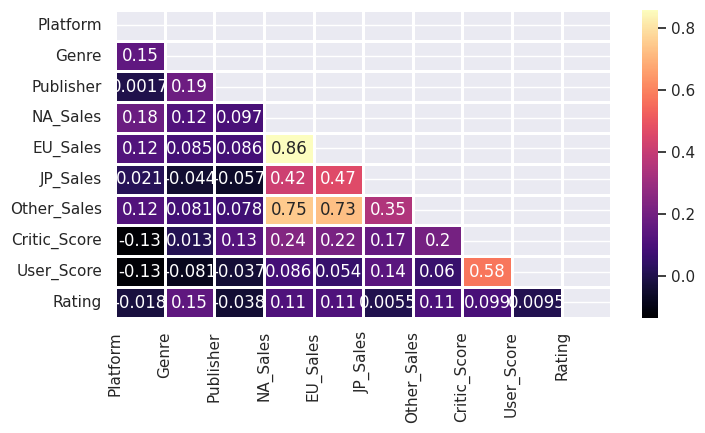

In [ ]:
fig, ax = plt.subplots(figsize=(8, 4))
corr = Train.corr(method='pearson')
sns.heatmap(corr, annot=True, cmap = 'magma', linewidths = 1, mask=np.triu(corr))
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
plt.show()

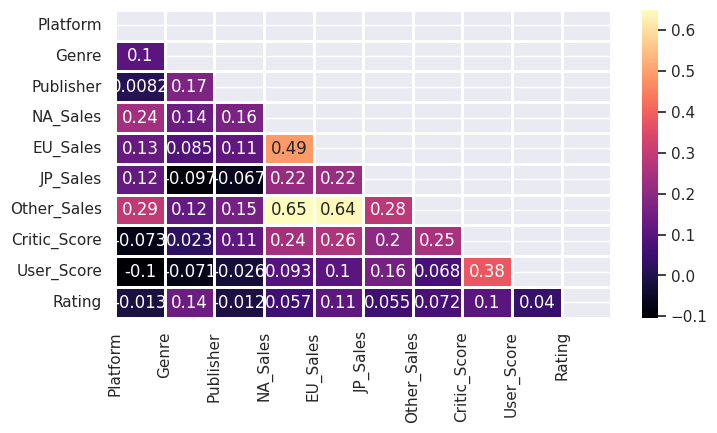

In [ ]:
#Kendall Correlation
fig, ax = plt.subplots(figsize=(8, 4))
corr = Train.corr(method='kendall')
sns.heatmap(corr, annot=True, cmap = 'magma', linewidths = 1, mask=np.triu(corr))
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
plt.show()

In [ ]:
#Standard Scaling
from sklearn.preprocessing import StandardScaler

X_train = Train.drop(['NA_Sales'], axis = 1)
X_test = Test.drop(['NA_Sales'], axis = 1)
y_train = Train['NA_Sales']
y_test = Test['NA_Sales']

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
pd.DataFrame(X_train[0:3,:], columns = Train.drop(['NA_Sales'], axis = 1).columns)

,Platform,Genre,Publisher,EU_Sales,JP_Sales,Other_Sales,Critic_Score,User_Score,Rating
0,-0.847140,0.559479,0.929928,-0.285175,-0.229883,-0.282732,0.434922,0.831223,0.579523
1,-0.169116,0.005996,-0.522255,0.396355,0.318094,0.233213,0.434922,0.477459,0.579523
2,-1.672980,-0.108672,0.929928,-0.297131,-0.229883,-0.282732,0.506908,-0.017811,-1.026599


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

decision_tree_reg = DecisionTreeRegressor(max_depth=10)
decision_tree_reg.fit(X_train, y_train)

y_pred_DTR_test = decision_tree_reg.predict(X_test)
accuracy_DTR_test = r2_score(y_test, y_pred_DTR_test)
print("Accuracy for Decision Tree Regression Model: ", accuracy_DTR_test)
RMSE_DTR_test = sqrt(mean_squared_error(y_test, y_pred_DTR_test))
print("RMSE: ", RMSE_DTR_test)

Accuracy for Decision Tree Regression Model:  0.6905131265400251
RMSE:  0.5747399897112393


<function matplotlib.pyplot.show(close=None, block=None)>

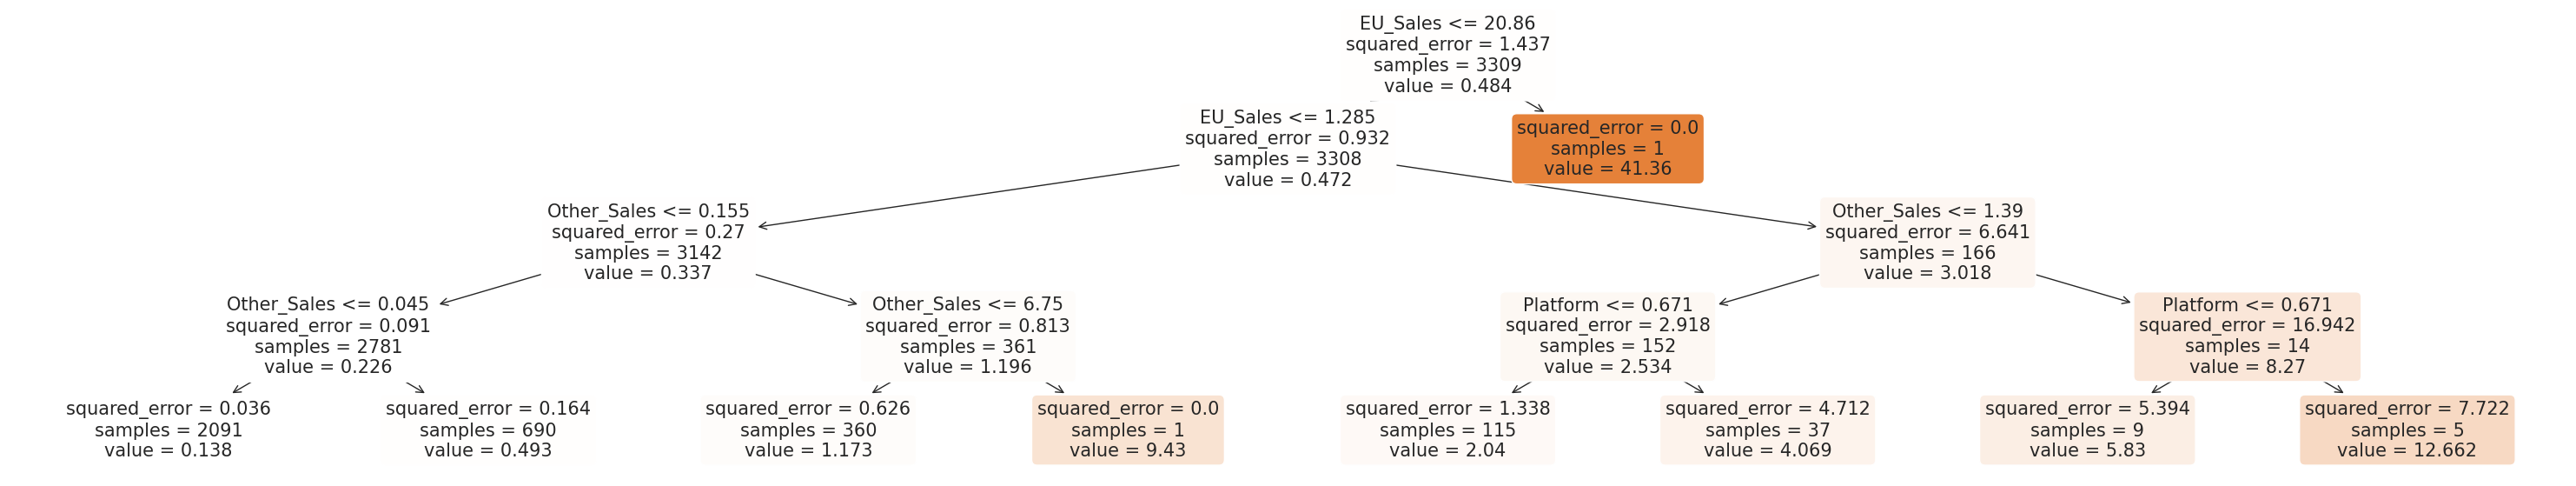

In [ ]:
#Datos originales

import pydotplus
from sklearn import tree

decision_tree_reg_unscaled = DecisionTreeRegressor(max_depth=4)
decision_tree_reg_unscaled.fit(Train.drop(['NA_Sales'], axis = 1), Train['NA_Sales'])

plt.figure(figsize=(38,7))
tree.plot_tree(decision_tree_reg_unscaled, filled=True, rounded=True, feature_names=Test.drop(['NA_Sales'], axis = 1).columns, fontsize=15)
plt.show

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor

random_forest_reg = RandomForestRegressor(n_estimators=600, max_depth=12)
random_forest_reg.fit(X_train, y_train)


y_pred_RFR_test = random_forest_reg.predict(X_test)
accuracy_RFR_test = r2_score(y_test, y_pred_RFR_test)
print("Accuracy for Random Forest Regression Model: ", accuracy_RFR_test)
RMSE_RFR_test = sqrt(mean_squared_error(y_test, y_pred_RFR_test))
print("RMSE: ", RMSE_RFR_test)

Accuracy for Random Forest Regression Model:  0.827561265192246
RMSE:  0.429010293827825


In [ ]:
#Support Vector
from sklearn.svm import SVR

support_vector_reg = SVR(gamma="auto", kernel="linear", C=500  )
support_vector_reg.fit(X_train, y_train)

y_pred_SVR_test = support_vector_reg.predict(X_test)
accuracy_SVR_test = r2_score(y_test, y_pred_SVR_test)
print("Accuracy for Support Vector Regression Model: ", accuracy_SVR_test)
RMSE_SVR_test = sqrt(mean_squared_error(y_test, y_pred_SVR_test))
print("RMSE: ", RMSE_SVR_test)

Accuracy for Support Vector Regression Model:  0.6972940312647169
RMSE:  0.5684087977656055


In [ ]:
#XGBoost
import xgboost as xgb

XGB_reg = xgb.XGBRegressor(
    objective="reg:squarederror",  # Regression task
    max_depth=6,                  # Maximum depth of the tree
    learning_rate=0.1,            # Learning rate
    n_estimators=500, # Number of boosting rounds
)
XGB_reg.fit(X_train, y_train)

y_pred_XGB_test = XGB_reg.predict(X_test)
accuracy_XGB_test = r2_score(y_test, y_pred_XGB_test)
print("Accuracy for XGBoost Regression Model: ", accuracy_XGB_test)
RMSE_XGB_test = sqrt(mean_squared_error(y_test, y_pred_XGB_test))
print("RMSE: ", RMSE_XGB_test)

Accuracy for XGBoost Regression Model:  0.8521389794405972
RMSE:  0.3972621134839706


In [ ]:
#Summary
testing_accuracies = [accuracy_DTR_test, accuracy_RFR_test, accuracy_SVR_test, accuracy_XGB_test]
testing_RMSE = [RMSE_DTR_test, RMSE_RFR_test, RMSE_SVR_test, RMSE_XGB_test]
table_data = {"Accuracy": testing_accuracies, "RMSE": testing_RMSE}
model_names = ["Decision Tree Regression", "Random Forest Regression", "Support Vector Regression", "XGBoost"]

table_dataframe = pd.DataFrame(data=table_data, index=model_names)
table_dataframe

,Accuracy,RMSE
Decision Tree Regression,0.690513,0.574740
Random Forest Regression,0.827561,0.429010
Support Vector Regression,0.697294,0.568409
XGBoost,0.852139,0.397262


## Fine Tuning

In [ ]:
#GridSearch
from sklearn import ensemble
from sklearn.model_selection import GridSearchCV

tuned_parameters = {'n_estimators': [400, 800], 'max_depth': [6, 15]}
gridsearch = GridSearchCV(ensemble.RandomForestRegressor(), tuned_parameters, cv=2, n_jobs=-1, verbose=2)
gridsearch.fit(X_train, y_train)
print(gridsearch.best_estimator_)

Fitting 2 folds for each of 4 candidates, totalling 8 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


RandomForestRegressor(max_depth=15, n_estimators=400)


In [ ]:
#Volvemos a hacer Random Forest con estos nuevos parámetros
random_forest_reg2 = RandomForestRegressor(n_estimators=700, max_depth=15)
random_forest_reg2.fit(X_train, y_train)

y_pred_RFR_test2 = random_forest_reg2.predict(X_test)
accuracy_RFR_test2 = r2_score(y_test, y_pred_RFR_test2)
print("Accuracy for Random Forest Regression Model: ", accuracy_RFR_test2)
RMSE_RFR_test2 = sqrt(mean_squared_error(y_test, y_pred_RFR_test2))
print("RMSE: ", RMSE_RFR_test2)

Accuracy for Random Forest Regression Model:  0.8274202319562745
RMSE:  0.42918569625064346


<Axes: xlabel='NA_Sales', ylabel='NA_Sales'>

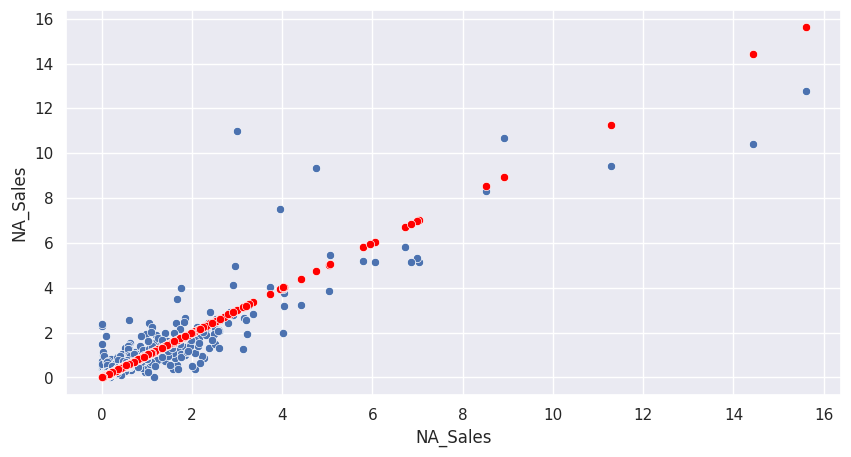

In [ ]:
#Visualizamos este modelo
plt.figure(figsize=(10,5))
sns.scatterplot(x = y_test, y = y_pred_RFR_test2)
sns.scatterplot(x = y_test, y = y_test, color='Red')

## Feature Importance

<Axes: ylabel='None'>

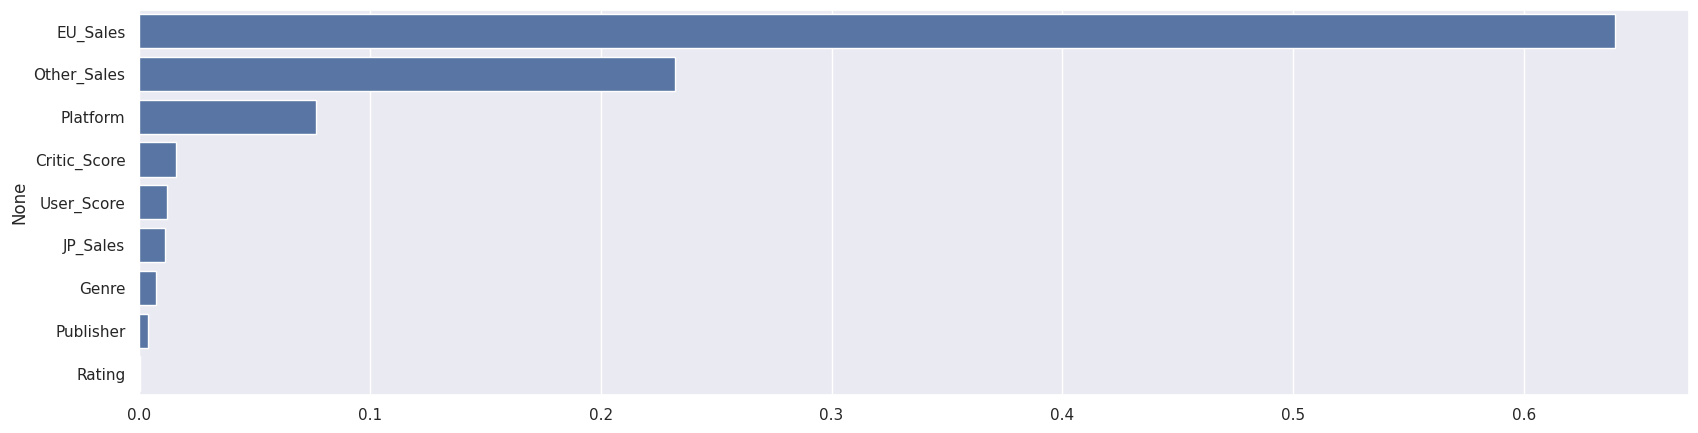

In [ ]:
tree_importances = pd.Series(decision_tree_reg.feature_importances_, index=Train.drop(['NA_Sales'], axis = 1).columns)
importance = tree_importances.sort_values(ascending=False)
sns.barplot(y = importance.index, x = importance.values, )

<Axes: ylabel='None'>

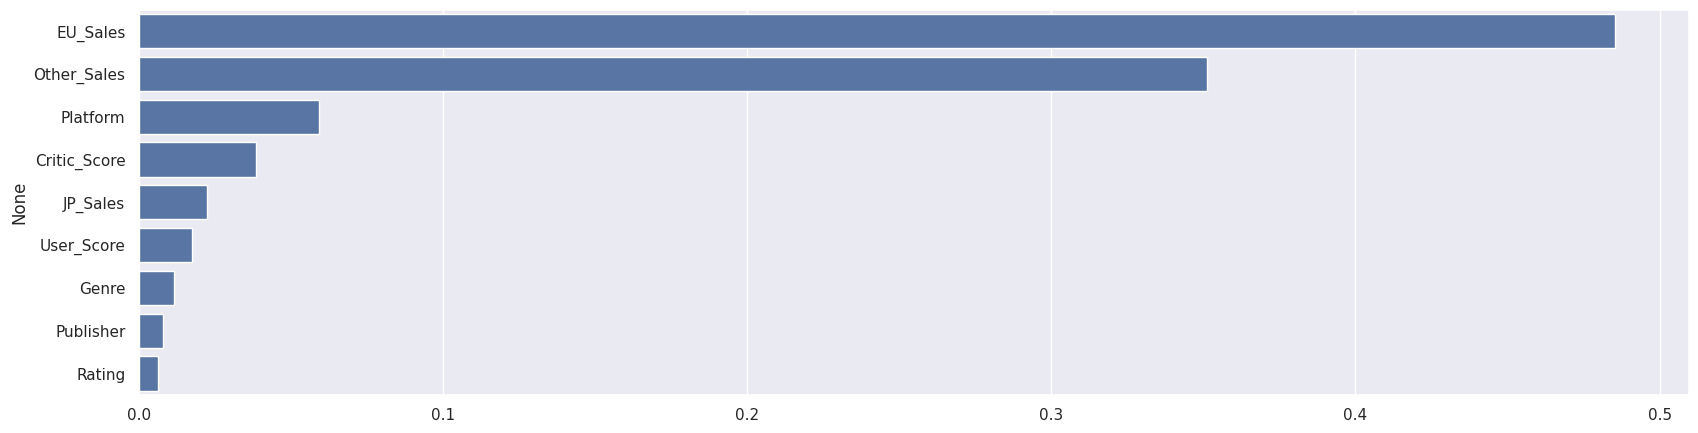

In [ ]:
forest_importances = pd.Series(random_forest_reg2.feature_importances_, index=Train.drop(['NA_Sales'], axis = 1).columns)
importance = forest_importances.sort_values(ascending=False)
sns.barplot(y = importance.index, x = importance.values, )

<Axes: ylabel='None'>

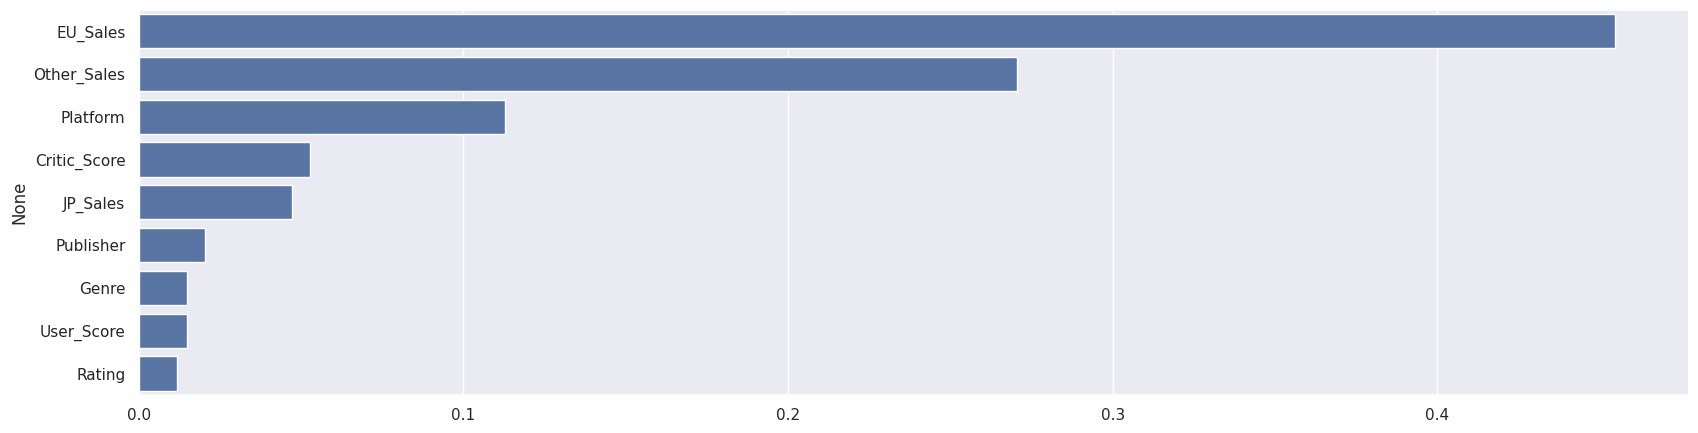

In [ ]:
XGB_importances = pd.Series(XGB_reg.feature_importances_, index=Train.drop(['NA_Sales'], axis = 1).columns)
importance = XGB_importances.sort_values(ascending=False)
sns.barplot(y = importance.index, x = importance.values, )

## Predicting new data

In [ ]:
Train.head(3)

,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,User_Score,Rating
6911,0.300964,0.563368,0.591938,0.18,0.05,0.00,0.01,77.0,8.4,0.562427
720,0.447684,0.485127,0.423818,1.25,0.62,0.18,0.18,77.0,7.9,0.562427
13306,0.122256,0.468918,0.591938,0.00,0.04,0.00,0.01,78.0,7.2,0.345845


In [ ]:
New_game = {'Platform': region_map_platform['PS2'],
              'Genre': region_map_genre['Action'],
              'Publisher': region_map_publisher['Sony Computer Entertainment'],
              'EU_Sales': [1.0],
              'JP_Sales': [2.3],
              'Other_Sales': [0.8],
              'Critic_Score': [80.0],
              'User_Score': [8.2],
              'Rating':region_map_rating['E']}
New_game = pd.DataFrame(New_game)
New_game = scaler.transform(New_game)
random_forest_reg2.predict(New_game.reshape(1, -1))

array([2.10673147])

# Unsupervised ML

In [ ]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4728 entries, 0 to 16926
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Platform      4728 non-null   float64
 1   Genre         4728 non-null   float64
 2   Publisher     4728 non-null   float64
 3   NA_Sales      4728 non-null   float64
 4   EU_Sales      4728 non-null   float64
 5   JP_Sales      4728 non-null   float64
 6   Other_Sales   4728 non-null   float64
 7   Critic_Score  4728 non-null   float64
 8   User_Score    4728 non-null   float64
 9   Rating        4728 non-null   float64
dtypes: float64(10)
memory usage: 406.3 KB


In [ ]:
pred=df_pred.copy()

In [ ]:
#Preparamos datos

region_map_All = df_pred.groupby(['Genre'])['NA_Sales'].mean().to_dict()
region_map_All = {k: v + random.uniform(0, 0.000001) for k,v in region_map_All.items()}
df_pred['Genre'] = df_pred['Genre'].map(region_map_All)

region_map_All = df_pred.groupby(['Publisher'])['NA_Sales'].mean().to_dict()
region_map_All = {k: v + random.uniform(0, 0.000001) for k,v in region_map_All.items()}
df_pred['Publisher'] = df_pred['Publisher'].map(region_map_All)

region_map_All = df_pred.groupby(['Platform'])['NA_Sales'].mean().to_dict()
region_map_All = {k: v + random.uniform(0, 0.000001) for k,v in region_map_All.items()}
df_pred['Platform'] = df_pred['Platform'].map(region_map_All)

region_map_All = df_pred.groupby(['Rating'])['NA_Sales'].mean().to_dict()
region_map_All = {k: v + random.uniform(0, 0.000001) for k,v in region_map_All.items()}
df_pred['Rating'] = df_pred['Rating'].map(region_map_All)

#Standard Scaling
sc_All = StandardScaler()
sc_All.fit(df_pred)
df_EDA_All_Scaled = pd.DataFrame(sc_All.transform(df_pred), columns = df_pred.columns )
print('Shape df_EDA_All_Scaled', df_EDA_All_Scaled.shape,'\n')
df_EDA_All_Scaled.head(3)

Shape df_EDA_All_Scaled (4728, 10) 



,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,User_Score,Rating
0,2.220815,0.526211,-0.484699,35.500485,34.955661,10.923406,25.955547,0.355690,0.548669,0.710843
1,2.220815,-0.122020,-0.484699,13.200111,15.202539,10.982564,9.912530,0.783458,0.758142,0.710843
2,2.220815,0.526211,-0.484699,13.139323,12.971167,9.474035,8.855432,0.640869,0.548669,0.710843


## K Means

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

k_rng = range(2,10)
sse = []                  #sum of squared errors
silhouette_scores = []    #silhouette scores
for k in k_rng:
  km_model = KMeans(n_clusters=k, n_init='auto')
  km_model.fit(df_EDA_All_Scaled)
  cluster_labels = km_model.fit_predict(df_EDA_All_Scaled)
  sse.append(km_model.inertia_)
  silhouette_scores.append(silhouette_score(df_EDA_All_Scaled, cluster_labels, metric='euclidean'))

Elbow Method

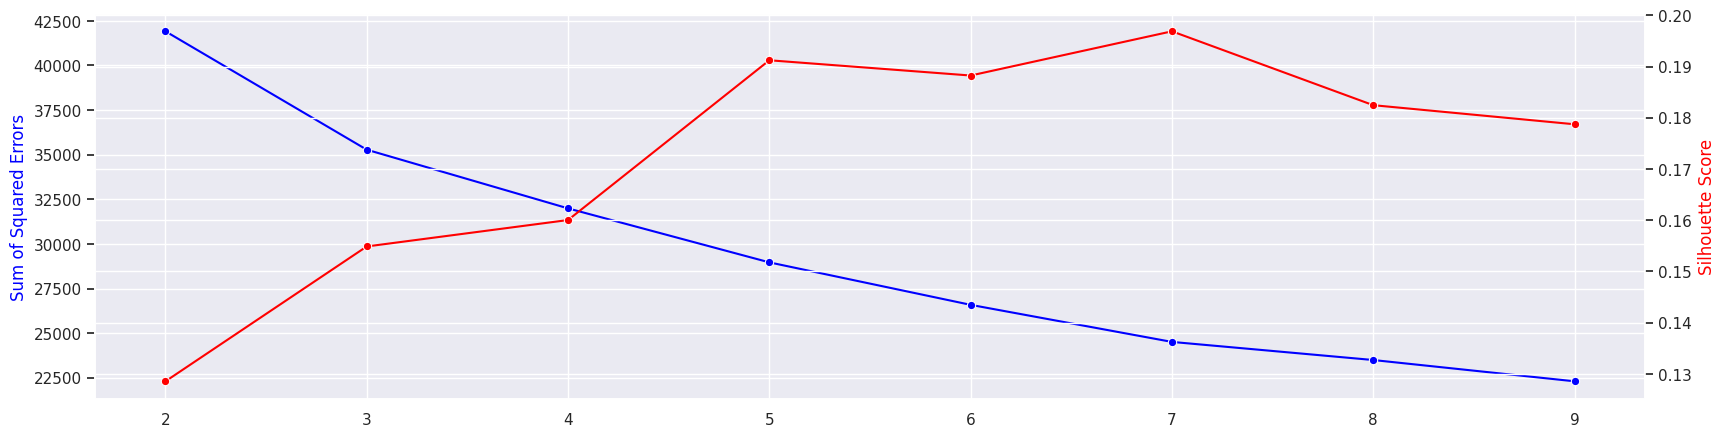

In [ ]:
sns.set(rc={'figure.figsize':(20,5)})

ax1 = sns.lineplot(x = k_rng, y = sse, marker="o", color = 'blue')
ax1.set_ylabel('Sum of Squared Errors', color = 'blue')

ax2 = plt.twinx()
sns.lineplot(x = k_rng, y = silhouette_scores, marker="o", color = 'red', ax=ax2)
ax2.set_ylabel('Silhouette Score', color = 'red')

plt.show()

Use 3

In [ ]:
km_model = KMeans(n_clusters = 3, n_init='auto')
km_model.fit(df_EDA_All_Scaled)
df_EDAClusteredKMeans = df_pred.copy()
df_EDAClusteredKMeans['Cluster KMeans'] = km_model.labels_
df_EDAClusteredKMeans[df_EDAClusteredKMeans['Cluster KMeans'] == 2].groupby('Rating').size()

Rating
0.347814    531
0.360000    291
0.567815    430
0.636268    231
dtype: int64

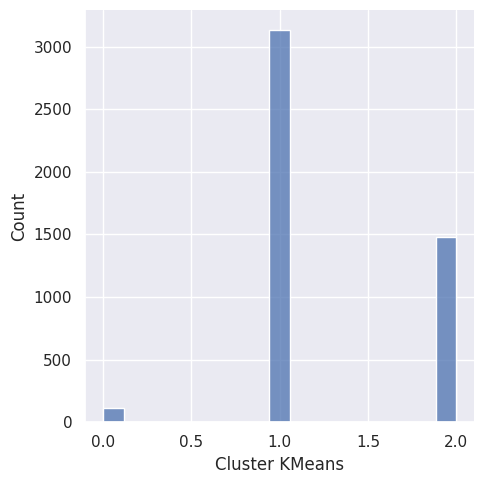

In [ ]:
sns.displot(data = df_EDAClusteredKMeans, x = 'Cluster KMeans')

## Density Based Spatial Clustering of Applications with Noise (DBSCAN)

In [ ]:
from sklearn.cluster import DBSCAN
DBSCAN_clustering = DBSCAN(eps=2, min_samples = int(round(len(df_EDA_All_Scaled)*.1,0))).fit(df_EDA_All_Scaled)
df_EDAClusteredDBSCAN = df_pred.copy(deep=True)
df_EDAClusteredDBSCAN['Cluster DBSCAN'] = DBSCAN_clustering.labels_
df_EDAClusteredDBSCAN.head(5)

,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,User_Score,Rating,Cluster DBSCAN
0,0.955666,0.553068,0.427694,41.36,28.96,3.77,8.45,76.0,8.0,0.567815,-1
2,0.955666,0.462330,0.427694,15.68,12.76,3.79,3.29,82.0,8.3,0.567815,-1
3,0.955666,0.553068,0.427694,15.61,10.93,3.28,2.95,80.0,8.0,0.567815,-1
6,0.450461,0.573857,0.427694,11.28,9.14,6.50,2.88,89.0,8.5,0.567815,-1
7,0.955666,0.727199,0.427694,13.96,9.18,2.93,2.84,58.0,6.6,0.567815,-1


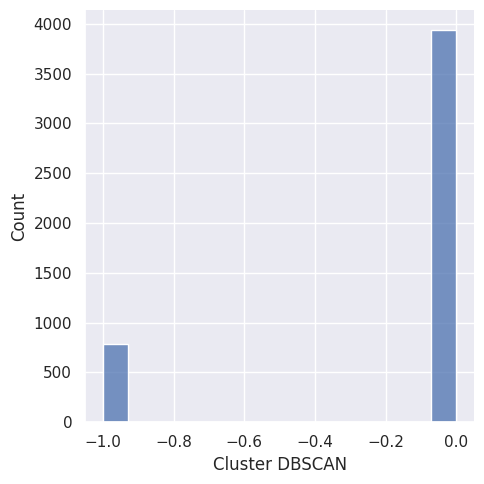

In [ ]:
sns.displot(data = df_EDAClusteredDBSCAN, x = 'Cluster DBSCAN')

## Centroids for K-Means and DBSCAN

In [ ]:
centroidsDBSCAN = pd.DataFrame(df_EDAClusteredDBSCAN.groupby(['Cluster DBSCAN']).mean(), columns = df_EDA_All_Scaled.columns )
centroidsDBSCAN

,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,User_Score,Rating
Cluster DBSCAN,,,,,,,,,,
-1,0.545537,0.505782,0.568875,1.405858,0.970839,0.294943,0.346569,69.447268,6.406099,0.485471
0,0.466205,0.474144,0.461544,0.294402,0.156488,0.033527,0.052898,71.323268,7.375590,0.478200


In [ ]:
centroidsKMeans = pd.DataFrame(sc_All.inverse_transform(km_model.cluster_centers_), columns = df_EDA_All_Scaled.columns )
centroidsKMeans

,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,User_Score,Rating
0,0.585502,0.515892,0.521890,4.899818,3.616182,1.384000,1.297091,86.872727,7.727273,0.538417
1,0.438417,0.477699,0.485893,0.450035,0.258922,0.059901,0.089091,77.504625,7.863923,0.487122
2,0.558199,0.480322,0.462556,0.213628,0.115489,0.016332,0.039946,56.107215,5.802697,0.458732


compara df_pred con df_EDA_All_Scaled

In [ ]:
df_pred

,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,User_Score,Rating
0,0.955666,0.553068,0.427694,41.36,28.96,3.77,8.45,76.0,8.0,0.567815
2,0.955666,0.462330,0.427694,15.68,12.76,3.79,3.29,82.0,8.3,0.567815
3,0.955666,0.553068,0.427694,15.61,10.93,3.28,2.95,80.0,8.0,0.567815
6,0.450461,0.573857,0.427694,11.28,9.14,6.50,2.88,89.0,8.5,0.567815
7,0.955666,0.727199,0.427694,13.96,9.18,2.93,2.84,58.0,6.6,0.567815
...,...,...,...,...,...,...,...,...,...,...
16917,0.366801,0.553068,0.744986,0.43,0.16,0.00,0.01,86.0,7.7,0.567815
16921,0.510398,0.573857,0.427694,0.50,0.02,0.00,0.08,45.0,6.0,0.360000
16923,0.534899,0.662674,0.427694,0.20,0.29,0.00,0.11,43.0,3.6,0.636268
16925,0.534899,0.662674,0.427694,0.09,0.06,0.42,0.03,64.0,7.4,0.636268


In [ ]:
df_EDA_All_Scaled

,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,User_Score,Rating
0,2.220815,0.526211,-0.484699,35.500485,34.955661,10.923406,25.955547,0.355690,0.548669,0.710843
1,2.220815,-0.122020,-0.484699,13.200111,15.202539,10.982564,9.912530,0.783458,0.758142,0.710843
2,2.220815,0.526211,-0.484699,13.139323,12.971167,9.474035,8.855432,0.640869,0.548669,0.710843
3,-0.134996,0.674728,-0.484699,9.379175,10.788569,18.998475,8.637794,1.282522,0.897791,0.710843
4,2.220815,1.770203,-0.484699,11.706472,10.837342,8.438769,8.513430,-0.927616,-0.428870,0.710843
...,...,...,...,...,...,...,...,...,...,...
4723,-0.525108,0.526211,2.489065,-0.042907,-0.161001,-0.227880,-0.285357,1.068638,0.339197,0.710843
4724,0.144496,0.674728,-0.484699,0.017880,-0.331707,-0.227880,-0.067719,-1.854448,-0.847815,-0.960147
4725,0.258747,1.309233,-0.484699,-0.242638,-0.002489,-0.227880,0.025554,-1.997038,-2.523596,1.261254
4726,0.258747,1.309233,-0.484699,-0.338161,-0.282934,1.014439,-0.223175,-0.499848,0.129724,1.261254


In [ ]:
resultados = df_EDA_All_Scaled[df_EDA_All_Scaled['Publisher'] == 0.427694]
resultados

,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,User_Score,Rating


# ANN Model

In [ ]:
from sklearn.linear_model import LinearRegression
modelLinear = LinearRegression().fit(X_train, y_train)

In [ ]:
predictionsLin = modelLinear.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
df_Performance = pd.DataFrame({'MAE':[mean_absolute_error(y_test,predictionsLin)],
                               'RMSE':[np.sqrt(mean_squared_error(y_test,predictionsLin))],
                               'r2.score':[r2_score(y_test,predictionsLin)]}, index=['Linear Regression'])
df_Performance

,MAE,RMSE,r2.score
Linear Regression,0.268313,0.577754,0.687258


In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
modelANN = Sequential()

modelANN.add(Dense(32,activation='relu')); modelANN.add(Dropout(0.2))
modelANN.add(Dense(16,activation='tanh')); modelANN.add(Dropout(0.2))
modelANN.add(Dense(1,activation='relu'))

modelANN.compile(optimizer='adam',loss='mse')
early_stopping = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)
history = modelANN.fit(x=X_train, y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128, epochs=3, callbacks=[early_stopping])

Epoch 1/3
26/26 [==============================] - 1s 10ms/step - loss: 1.3557 - val_loss: 0.7763
Epoch 2/3
26/26 [==============================] - 0s 4ms/step - loss: 1.1201 - val_loss: 0.5803
Epoch 3/3
26/26 [==============================] - 0s 4ms/step - loss: 1.0131 - val_loss: 0.5159


<Axes: >

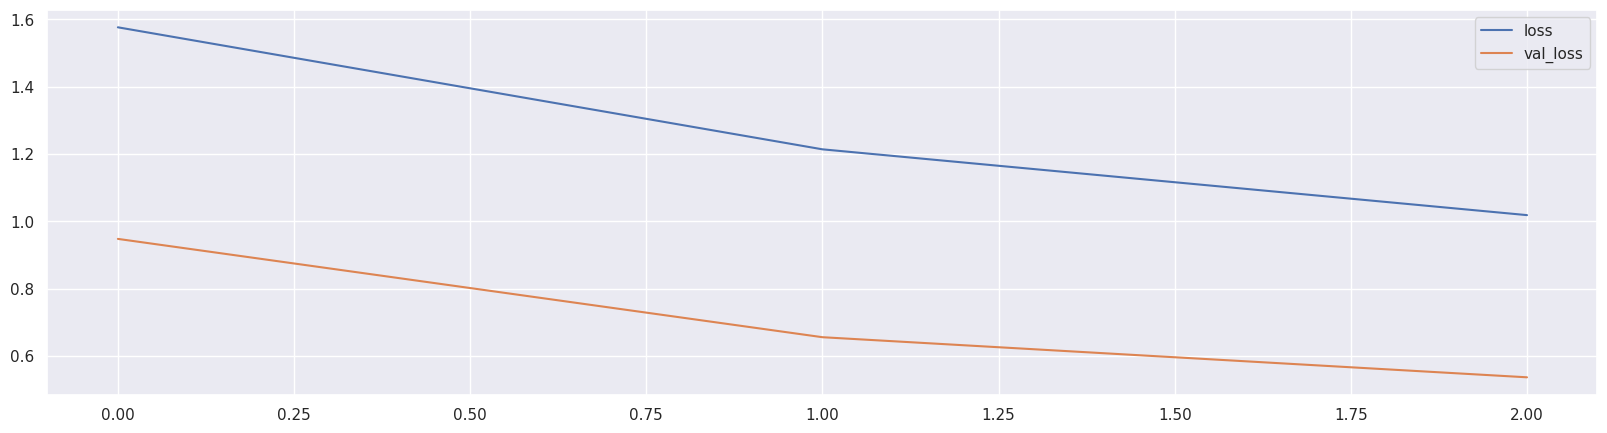

In [ ]:
losses = pd.DataFrame(modelANN.history.history)
losses.plot()

In [ ]:
predictionsANN = modelANN.predict(X_test)

45/45 [==============================] - 0s 2ms/step


In [ ]:
df_Temp = pd.DataFrame({'MAE':[mean_absolute_error(y_test,predictionsANN)],
                               'RMSE':[np.sqrt(mean_squared_error(y_test,predictionsANN))],
                               'r2.score':[r2_score(y_test,predictionsANN)]}, index=['Artificial Neural Network'])

df_Temp


,MAE,RMSE,r2.score
Artificial Neural Network,0.310601,0.723232,0.509933


In [ ]:
modelANN.predict(New_game.reshape(1, -1))

1/1 [==============================] - 0s 123ms/step


array([[2.6493025]], dtype=float32)